# Importing Libraries

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_curve,auc,roc_auc_score
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Reading Data From CSV

In [5]:
data = pd.read_csv(r'C:\Users\Omkar\Downloads\textmining_class.csv')
data

,sl no,Expressions,Category
0,1,She is a good dancer.,1
1,2,This book is the best in town,1
2,3,He loves to drink coffee before he goes to bed,1
3,4,They are a good team,1
4,5,Today is the day to celebrate our victory,1
5,6,She is a good writer,1
6,7,He is good at math,1
7,8,I’m absolutely positive it was him,1
8,9,"In three years, everyone will be happy.",1
9,10,"If you walk into Knoxville, you’ll find a shop...",1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sl no        20 non-null     int64 
 1   Expressions  20 non-null     object
 2   Category     20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [7]:
data.columns

Index(['sl no', 'Expressions', 'Category'], dtype='object')

# Data Preprocessing

In [8]:
data = data.drop('sl no', axis=1)

In [9]:
data['Expressions'] = data['Expressions'].str.strip().str.lower()

In [10]:
data

,Expressions,Category
0,she is a good dancer.,1
1,this book is the best in town,1
2,he loves to drink coffee before he goes to bed,1
3,they are a good team,1
4,today is the day to celebrate our victory,1
5,she is a good writer,1
6,he is good at math,1
7,i’m absolutely positive it was him,1
8,"in three years, everyone will be happy.",1
9,"if you walk into knoxville, you’ll find a shop...",1


# Splitting Data

In [11]:
# Split into training and testing data
x = data['Expressions']
y = data['Category']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.30, random_state=42)

# Vectorizing Text into Numbers

In [12]:
# Vectorize text reviews to numbers

vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

# Model Building

In [13]:
from sklearn.neural_network import MLPClassifier

In [30]:
mlp = MLPClassifier(hidden_layer_sizes=(10,10))
mlp.fit(x,y)

C:\Users\Omkar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 10))

# Prediction

In [31]:
predictions  = mlp.predict(x_test)
predictions

array([1, 1, 1, 1, 1, 1], dtype=int64)

# Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
print(confusion_matrix(y_test,predictions))

[[0 3]
 [0 3]]


# Classification Report

In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.50      1.00      0.67         3

    accuracy                           0.50         6
   macro avg       0.25      0.50      0.33         6
weighted avg       0.25      0.50      0.33         6



C:\Users\Omkar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Omkar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Omkar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ROC Curve

In [19]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
import matplotlib.pyplot as plt
from sklearn import metrics

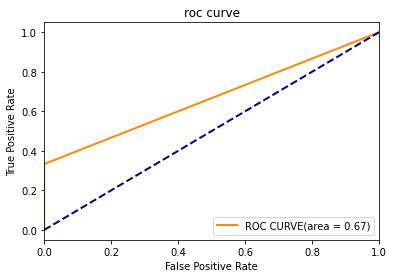

In [20]:
y_pred_prob = mlp.predict_proba(x_test)[:,1]
fpr,tpr,thresholds  = roc_curve(y_test,y_pred_prob,pos_label = 1)
auc = metrics.roc_auc_score(y_test,y_pred_prob)
plt.figure()
lw=2
plt.plot(fpr, tpr,color = 'darkorange',lw=lw,label = 'ROC CURVE(area = %0.2f)'%auc)
plt.plot([0, 1],[0,1],color = 'navy',lw=lw, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("roc curve")
plt.legend(loc = 'lower right')
plt.show()

In [25]:
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100))
mlp.fit(x,y)

MLPClassifier(hidden_layer_sizes=(100, 100, 100))

In [26]:
predictions  = mlp.predict(x_test)
predictions

array([1, 1, 1, 1, 1, 1], dtype=int64)

In [27]:
print(confusion_matrix(y_test,predictions))

[[0 3]
 [0 3]]


In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.50      1.00      0.67         3

    accuracy                           0.50         6
   macro avg       0.25      0.50      0.33         6
weighted avg       0.25      0.50      0.33         6



C:\Users\Omkar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Omkar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Omkar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


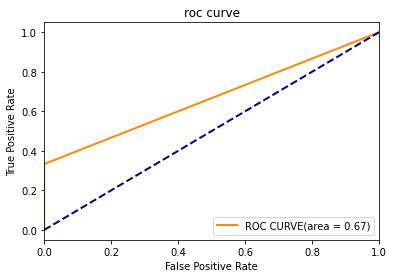

In [29]:
y_pred_prob = mlp.predict_proba(x_test)[:,1]
fpr,tpr,thresholds  = roc_curve(y_test,y_pred_prob,pos_label = 1)
auc = metrics.roc_auc_score(y_test,y_pred_prob)
plt.figure()
lw=2
plt.plot(fpr, tpr,color = 'darkorange',lw=lw,label = 'ROC CURVE(area = %0.2f)'%auc)
plt.plot([0, 1],[0,1],color = 'navy',lw=lw, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("roc curve")
plt.legend(loc = 'lower right')
plt.show()

In [34]:
mlp = MLPClassifier(hidden_layer_sizes=(5,5,5,5))
mlp.fit(x,y)

C:\Users\Omkar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(5, 5, 5, 5))

In [35]:
predictions  = mlp.predict(x_test)
predictions

array([0, 0, 0, 0, 0, 0], dtype=int64)

In [36]:
print(confusion_matrix(y_test,predictions))

[[3 0]
 [3 0]]


In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         3
           1       0.00      0.00      0.00         3

    accuracy                           0.50         6
   macro avg       0.25      0.50      0.33         6
weighted avg       0.25      0.50      0.33         6



C:\Users\Omkar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Omkar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Omkar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
mlp = MLPClassifier(hidden_layer_sizes=(25,25))
mlp.fit(x,y)

C:\Users\Omkar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(25, 25))

In [39]:
predictions  = mlp.predict(x_test)
predictions

array([0, 0, 0, 1, 0, 0], dtype=int64)

In [40]:
print(confusion_matrix(y_test,predictions))

[[3 0]
 [2 1]]


In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.33      0.50         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6



In [48]:
mlp = MLPClassifier(hidden_layer_sizes=(40,35))
mlp.fit(x,y)

MLPClassifier(hidden_layer_sizes=(40, 35))

In [49]:
predictions  = mlp.predict(x_test)
predictions

array([1, 1, 1, 1, 1, 1], dtype=int64)

In [50]:
print(confusion_matrix(y_test,predictions))

[[0 3]
 [0 3]]


In [51]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.50      1.00      0.67         3

    accuracy                           0.50         6
   macro avg       0.25      0.50      0.33         6
weighted avg       0.25      0.50      0.33         6



C:\Users\Omkar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Omkar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Omkar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
